## Homework 2
@oana vesa

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('classic')
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams['axes.labelweight'] = 'bold'
from scipy import integrate
import math
from scipy import interpolate

## Problem 1

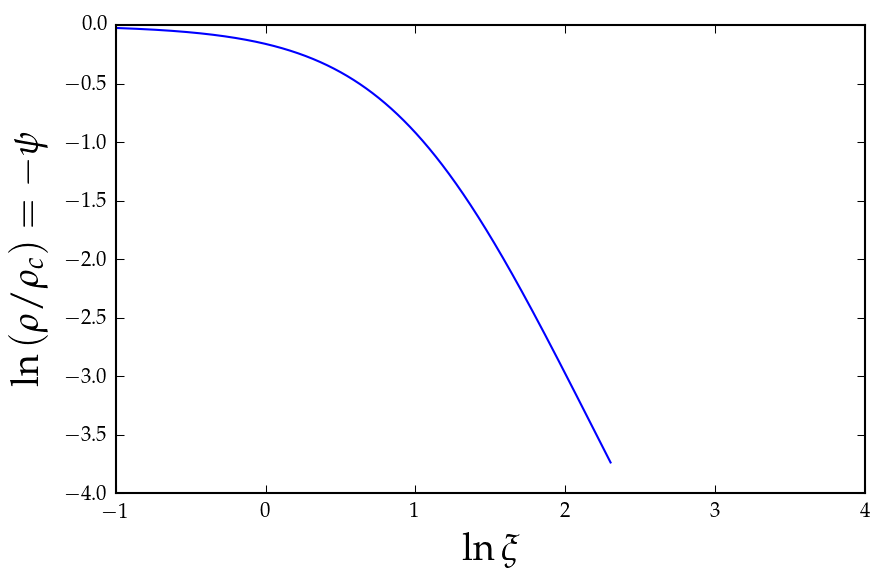

In [3]:
def bonnorebertODE(y,xi):  
    '''This function lays out the structure for solving the 2nd Order Differential Equation
    of the special case of the Lane-Embden equation for the Bonnor Ebert sphere. It
    decomposes the 2nd ODE into two 1st ODEs.
    
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
    
    Input:
    y =
        psi = y
        z = y' = dpsi/dxi
    xi = xi
    
    Output:
    dydx = the two first order differential equations
    '''
    psi, z = y  
    dydx = [z, (-2*z/xi) + np.exp(-psi)]  
    return dydx


# initial conditions
xi_0 = 10e-7
y0 = [10**(-7),10**(-7)]  
# time grid => xi
xi = np.linspace(xi_0,10, 10000)

# odeint( ODE_function, y0 = initial conditions, xi = time grid)
psi_sol = integrate.odeint(bonnorebertODE, y0, xi, hmax=1e-4)

#psi_sol[:,0] = y =psi
plt.figure(dpi=150)
plt.plot(np.log(xi),-(psi_sol[:,0]))
plt.xlabel(r'$ \ln \xi$', fontsize=18)
plt.ylabel(r'$ \ln \left( \rho/\rho_c \right) = -\psi$', fontsize=18)
plt.xlim(left=-1)
plt.tight_layout()
#plt.savefig('Plots/lnpvslnxi.png')
plt.show()

## Problem 3b

In [4]:

def sound_speed(kb,T,mu,m_H):
    '''This function calculates the sound speed.
    
    Input:
    kb = boltzmann constant
    T = temperature
    mu = mean molecular weight
    m_H = atomic mass number
    
    Output:
    sound speed 
    '''
    return ((kb*T)/(mu*m_H))


def pc(R,ximax,G,cs):
    '''This function computes the central density.
    
    Input:
    R = radius
    ximax = max xi from the paper
    G = gravitational constant
    cs = sound speed
    
    Output:
    the central density
    '''
    return (R**2/ximax**2)*(1/(4*np.pi*G*cs**2))


In [5]:


phys_radius = 12500 #AU
dist = 125 #pc
T = 16 #K
kb = 1.380658* 10**(-23) #Boltzmann's Constant (m^2*kg/s^2/K)
amu = 1.6605402*10**(-27) # atomic mass number, (kg)
phys_radius_m = phys_radius*1.496e+11 # m
G = 6.67408e-11 # m^3/kg/s^2
mu = 3

#observational extinction
A = np.array([28,28,26,24,23,21,21,19,18,17,16,14,12,11,11,10, 9, 9,7.5,7.2,5.6,5.3,5.2,4.7,4.,3.3,2.7,2.1,1.8])
# arcseconds
r = np.array([10,12,15,19,21,25,29,31,34,37,40,43,46,50,53,56,60,63,66,70,73,76,80,83,86,90,93,96,100])




In [6]:
cs_value = sound_speed(kb,T,mu,amu)
central_density = pc(phys_radius_m,6.9,G,cs_value)

density = np.exp(-psi_sol[:,0]) # p/p_c
density_values = np.asarray(density*central_density) # just p

b = np.linspace(0,1,len(density_values))

In [7]:
listr= []
for i in range(0,len(density_values)):
    val = xi[i]/np.sqrt(4*np.pi*G*central_density/cs_value**2)
    listr.append(val)
listr = np.asarray(listr)

In [8]:
col = []
for i in range(len(b)):
    f = lambda x: 2*b[i]*(density_values[i])*(1/np.cos((x)**2))
    ans,err = integrate.quad(f,0,1)
    col.append(ans)
col = np.asarray(col)

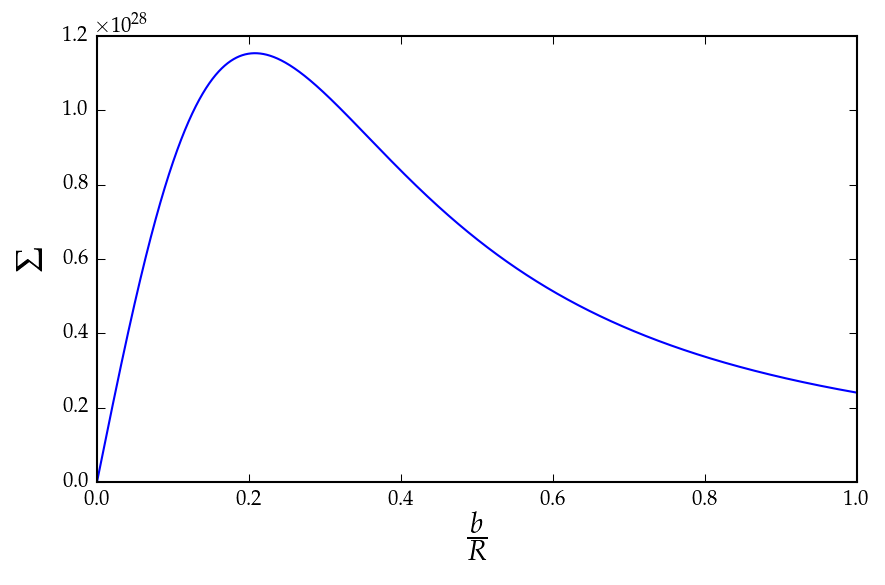

In [9]:
plt.figure(dpi=150)
plt.plot(b,(col))
plt.ylabel(r'$ \Sigma$', fontsize=18)
plt.xlabel(r'$ \frac{b}{R}$', fontsize=18)
plt.tight_layout()
#plt.savefig('Plots/columndensity_vs_distance.png')
plt.show()

In [10]:
def extinction(coldensity):
    A = 1.086*coldensity
    return A
new_extinction = extinction(col)

In [11]:
new_r = np.linspace(0,100, len(density_values))

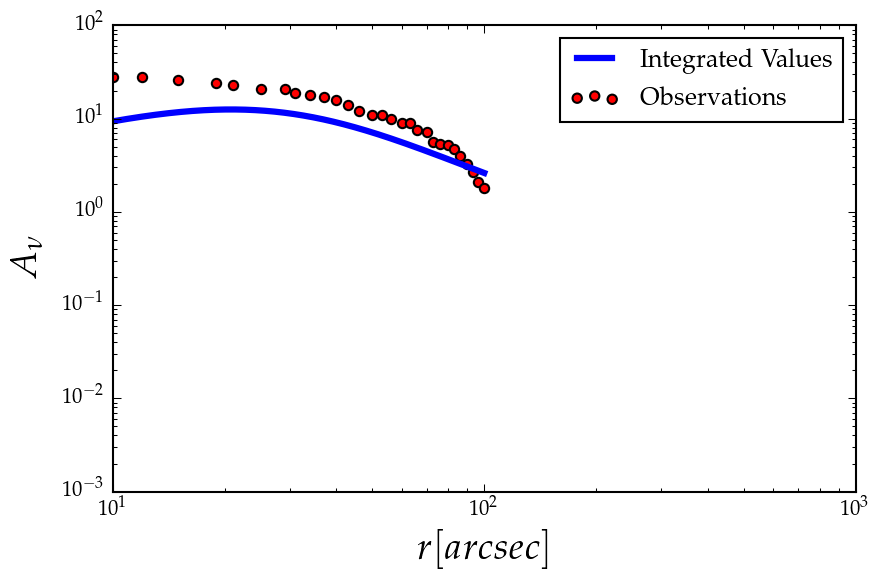

In [12]:
plt.figure(dpi=150)
plt.scatter(r,A, c='r', marker='o',label='Observations')
plt.yscale('log')
plt.loglog(new_r,1e-27*(new_extinction),linewidth=3,label= 'Integrated Values')

#plt.plot(extinction(columndensity_values))
plt.ylabel(r'$ A_{\nu}$', fontsize=18)
plt.xlabel(r'$ r [arcsec]$', fontsize=18)
plt.xlim(10)
plt.legend(loc = 'best')
plt.tight_layout()
#plt.savefig('Plots/extinction_vs_arcsec.png')
plt.show()

3c) I have no idea what to do, but based on my column density values, kappa = 1 x 10^-27 and mu = 3 ....
